# Mediods Analysis

This experiment has the purpose of analysing the medoid of some of the clusters defined in the previous experiment. According to it, the best number of cluster is ?? regarding the square of the 2-norm distance, ?? regarding the silhoutte score and ?? regarding the davies-bouldin score. Therefore, the number of clusters that we will use in the present experiment is ??.


In [1]:
import sys
sys.path.append('../')
from src import reader as r
from src import visualization as v

In [16]:
%matplotlib notebook
import numpy as np
import sklearn
print(sklearn.__version__)
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import pairwise_distances

0.20.0


In [3]:
X = r.readBOW()
npX = X.values
print(npX)
print(X.head(10))
print(X.shape)

['health.txt', 'bags.csv', 'word2vec.csv']
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.55220061 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9   ...    0.1185  0.1186  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

In [4]:
news = r.readNews()
print(news.head(10))

['health.txt', 'bags.csv', 'word2vec.csv']
                   id                    publish_date  \
0  576880531301801984  Sat Mar 14 23:00:11 +0000 2015   
1  576820122666471424  Sat Mar 14 19:00:08 +0000 2015   
2  576744652717461504  Sat Mar 14 14:00:15 +0000 2015   
3  576736754436304896  Sat Mar 14 13:28:52 +0000 2015   
4  576736614766010368  Sat Mar 14 13:28:18 +0000 2015   
5  576548368740052992  Sat Mar 14 01:00:17 +0000 2015   
6  576518190286536704  Fri Mar 13 23:00:22 +0000 2015   
7  576494177971732480  Fri Mar 13 21:24:57 +0000 2015   
8  576472874946433024  Fri Mar 13 20:00:18 +0000 2015   
9  576464606551490560  Fri Mar 13 19:27:27 +0000 2015   

                                       headline_test  
0  An abundance of online info can turn us into e...  
1  A plant-based diet that incorporates fish may ...  
2  It doesn't take much to damage your hearing at...  
3  RT @CNN: Forever young? Discover this island’s...  
4  RT @CNN: Is post-traumatic stress disorder in ...  

In [19]:
from MulticoreTSNE import MulticoreTSNE as TSNE

smp_sz = 10
tsne_bow = TSNE(n_components=2, perplexity=10, verbose=True, n_jobs=-1)#500
tsne_bow_result = tsne_bow.fit_transform(X[:smp_sz])

## Computing the Medoids
In here, we compute the medoids as the closest point to the centroids of the clusters.

In [6]:
best_K = 62
print("#############################")
print("Best K =", best_K)
print("Applying K-means")
best_cluster = KMeans(n_clusters=best_K, n_jobs=-1)
best_cluster_result = best_cluster.fit(X)
print("Finished")
print("#############################")    

#############################
Best K = 62
Applying K-means
Finished
#############################


In [7]:
y_pred = best_cluster.labels_
arrays=[]
for i in range(best_K):
    dist = np.linalg.norm(best_cluster.cluster_centers_[i]-npX[y_pred==i],axis=1)
    index = np.argmin(dist)
    arrays.append(npX[y_pred==i][index])   

medoids = np.vstack(arrays)
print(medoids.shape)
print(medoids)

(62, 1203)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:

l = []
for i in range(best_K):
    l.append(np.where(np.all(npX==medoids[i],axis=1))[0][0]) # these last [0][0] return the index, since the output of this command is (array([id]),)
    
index = np.array(l)
print(index)

[ 2298  7553  5856  9419 12028  6389  2970    98  4408  7764  7575  7428
   568 11000 10819  6109  2943  4106  2277   776  5874  2750  5434  6223
  5084  3690  3356  1840  9478   345 10132 12366  2527  6798  2784  6244
  9450  4613  5443  5066  4286 10950  2659  4565  2189  3585  2838   615
 10515 10223  3696 11619  6851  9312 12310 10712  3092   700  2937  5090
  2528  5770]


<IPython.core.display.Javascript object>


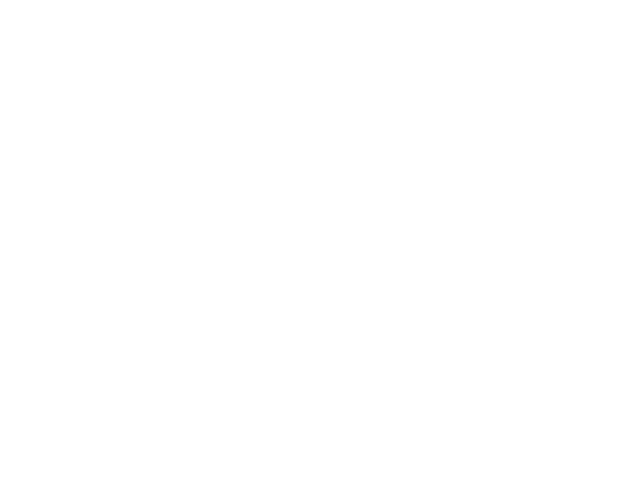

In [20]:
true_label = np.zeros((npX.shape[0],1))
np.put(true_label,index,1)
#v.visualize_sup_scatter(tsne_bow_result, true_label[:smp_sz], color=['k','r'])
info = np.take(news,index,0).loc[:,"headline_test"]
plot = v.visualize_sup_scatter_hover(tsne_bow_result, true_label[:smp_sz], info.values[:smp_sz])
plot.show()

## Headlines of the Medoids
After the medoids are computed, the headlines of the news represented by those medoids are shown bellow.

In [10]:
np.take(news,index,0)

,id,publish_date,headline_test
2298,351100742263767040,Sat Jun 29 22:11:54 +0000 2013,#Health minute: Summer foods for weight loss
7553,298192992341200896,Sun Feb 03 22:15:24 +0000 2013,Diet vs. exercise: which one really works for ...
5856,542724240311857152,Wed Dec 10 16:55:16 +0000 2014,Nearly half of Americans think #flu shot can m...
9419,577800657605828609,Tue Mar 17 11:56:26 +0000 2015,VIDEO: Burnham on mental health 'scandal'
12028,445385489462202371,Mon Mar 17 02:25:50 +0000 2014,'Vigorous exercise' cuts flu risk
6389,302983236961832961,Sun Feb 17 03:30:07 +0000 2013,10 emotional issues that impact his sexual res...
2970,314763312590106626,Thu Mar 21 15:39:56 +0000 2013,"When given a choice, workers choose cheaper #h..."
98,563807246438903809,Fri Feb 06 21:11:37 +0000 2015,Parents to parents: Vaccinating is personal @C...
4408,578283529894772736,Wed Mar 18 19:55:12 +0000 2015,"Could a ‘leaky gut’ be the cause of acne, fati..."
7764,296720799396659200,Wed Jan 30 20:45:26 +0000 2013,"The 10 most depressing country songs, ever:"
